In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-classification/cancer_classification.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploratory Data Analysis:

In [3]:
df=pd.read_csv("../input/cancer-classification/cancer_classification.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()
#There is not any null values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.isnull().sum()
#Here I check again whether there are null values or not

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [6]:
df.describe()
#Here we can fin statistical information about the data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


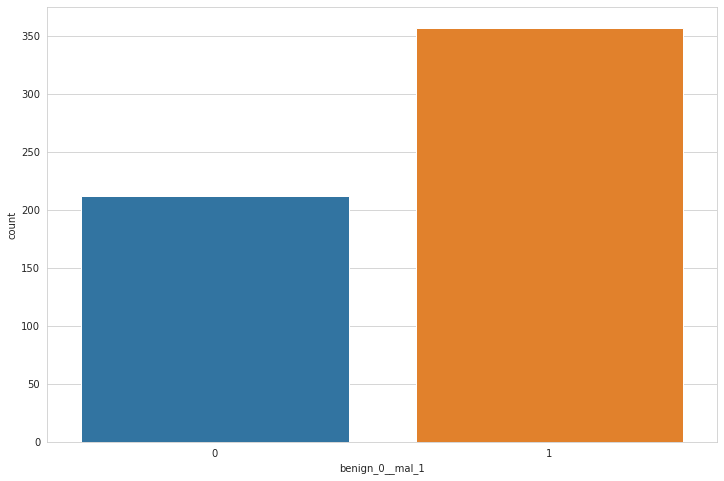

In [7]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
sns.countplot("benign_0__mal_1",data=df)
#This column is our target to predict and there are around 360 malignant and 210 benign tumors in the target column

In [8]:
df.corr()
#Here we can see the mutual correlation values between columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


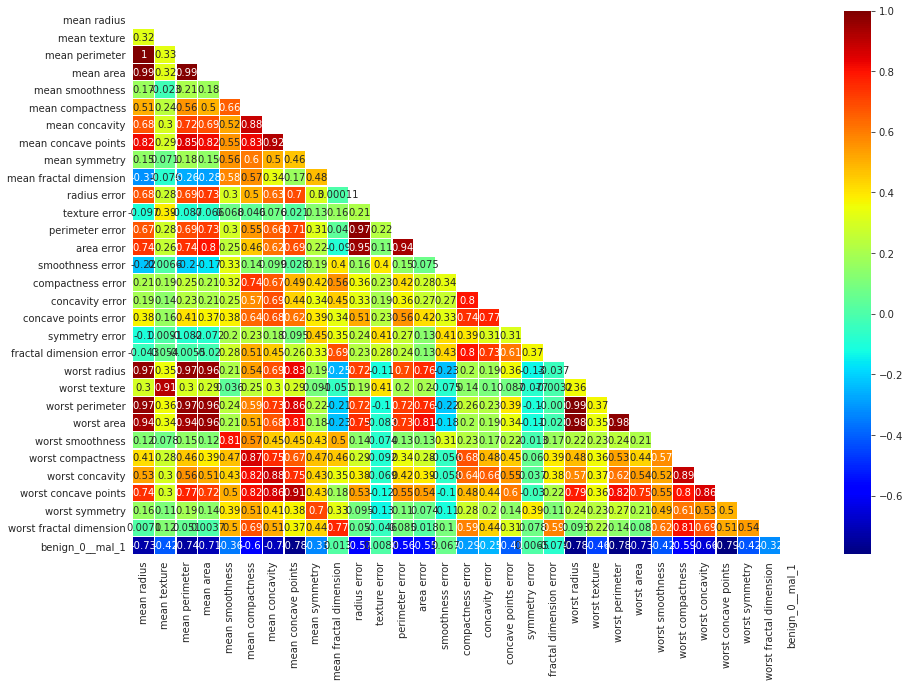

In [9]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),cmap="jet", annot=True, mask = mask,linewidths=0.2)
#we can easliy see that there is a negative correlation between the target column and the mojority of the feature columns

In [10]:
df.corr()["benign_0__mal_1"].sort_values(ascending=False)
#Here we can see the correlation values between the target column and the features
#This means that we will get good predictions with little errors

benign_0__mal_1            1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

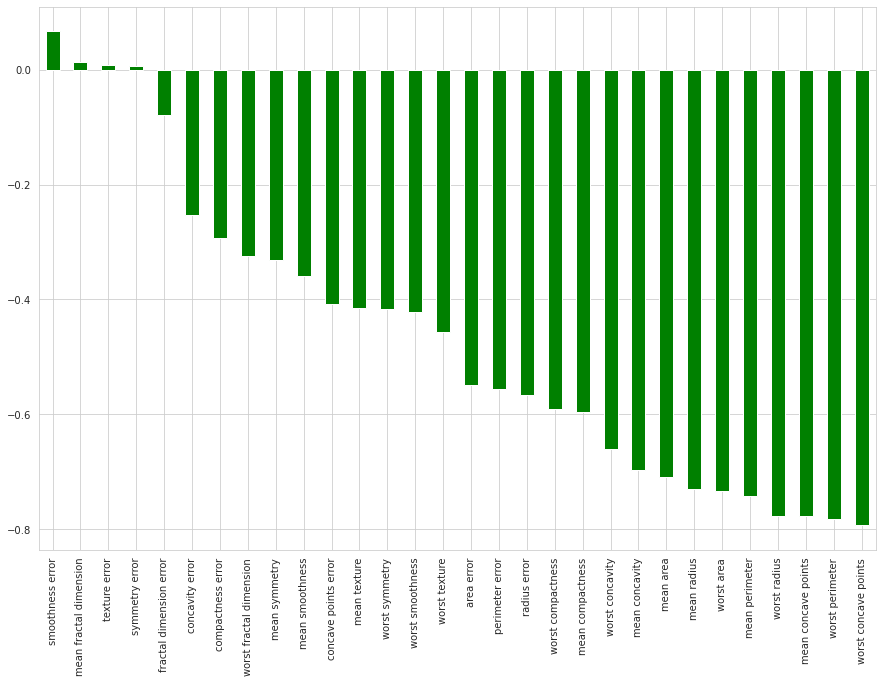

In [11]:
df.corr()["benign_0__mal_1"][:-1].sort_values(ascending=False).plot(kind="bar",figsize=(15,10),color="green")
#we can see better the correlations with this bar plot

# 2. Splitting and Training the Machine Learning Algorithms:

In [12]:
X=df.drop("benign_0__mal_1", axis=1) #I assign every column as features apart from benign_0__mal_1 column
X_deep=df.drop("benign_0__mal_1", axis=1).values # I make a separate X set for deep learning because it requires numpy array
y=df["benign_0__mal_1"]
y_deep=df["benign_0__mal_1"].values

In [13]:
X # This is for normal machine algorithms

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
X_deep#  this is for machine learning algorithm

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Firstly we will train our deep learning algorithm and later we will also other machine learning algorithms for classification

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_deep_train, X_deep_test, y_deep_train,y_deep_test=train_test_split(X_deep, y_deep, test_size=0.25)

Now we will scale our X train set before applying the algorithm 

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
X_deep_train=scaler.fit_transform(X_deep_train) # here we fit and transform our X dataset with the scaler
X_deep_test=scaler.fit_transform(X_deep_test)

In [20]:
X_deep_train #Here is the scaled version of the dataset

array([[0.43878335, 0.50497925, 0.44403041, ..., 0.35979381, 0.23082988,
        0.1606323 ],
       [0.20067592, 0.26182573, 0.20524668, ..., 0.37972509, 0.24088311,
        0.12613144],
       [0.18070562, 1.        , 0.17044269, ..., 0.10316151, 0.26532624,
        0.11826053],
       ...,
       [0.20579651, 0.31037344, 0.1994336 , ..., 0.37766323, 0.19850187,
        0.10448642],
       [0.56935839, 0.42614108, 0.54389626, ..., 0.44467354, 0.19751626,
        0.0152827 ],
       [0.04644375, 0.46763485, 0.05023103, ..., 0.09546392, 0.27735068,
        0.14482487]])

In [21]:
X_deep_train.shape

(426, 30)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#Here we import necessary units to create a basic deep learning algorithm

In [23]:
model1=Sequential()
model1.add(Dense(units=30, activation="relu")) #Here we select units as 30 because we have 30 features to train
model1.add(Dense(units=15, activation="relu"))
model1.add(Dense(units=1, activation="sigmoid"))# this is the last layer and we select sigmoid function as the function
#because we will predict a binary class
model1.compile(loss="binary_crossentropy",optimizer="adam") #This configures model for training


In [24]:
X_deep_train.shape

(426, 30)

In [25]:
X_deep_test.shape

(143, 30)

In [26]:
y_deep_train.shape

(426,)

In [27]:
y_deep_test.shape

(143,)

For a binary classification problem:

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model1.fit(x=X_deep_train,y=y_deep_train,epochs=300, validation_data=(X_deep_test, y_deep_test))

Epoch 1/300
14/14 [==============================] - 0s 11ms/step - loss: 0.6808 - val_loss: 0.6658
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6456 - val_loss: 0.6399
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 0.6061 - val_loss: 0.6066
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 0.5632 - val_loss: 0.5731
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 0.5184 - val_loss: 0.5286
Epoch 6/300
14/14 [==============================] - 0s 2ms/step - loss: 0.4714 - val_loss: 0.4886
Epoch 7/300
14/14 [==============================] - 0s 2ms/step - loss: 0.4255 - val_loss: 0.4548
Epoch 8/300
14/14 [==============================] - 0s 3ms/step - loss: 0.3866 - val_loss: 0.4069
Epoch 9/300
14/14 [==============================] - 0s 2ms/step - loss: 0.3472 - val_loss: 0.3894
Epoch 10/300
14/14 [==============================] - 0s 2ms/step - loss: 0.3149 - val_loss: 0.3445
Epoch 11

In [29]:
pd.DataFrame(model1.history.history)
#Here we can see the comparison of our loss both in the training data and the validation data

,loss,val_loss
0,0.680762,0.665784
1,0.645597,0.639863
2,0.606079,0.606577
3,0.563190,0.573066
4,0.518431,0.528566
...,...,...
295,0.020894,0.116932
296,0.021186,0.116057
297,0.020153,0.116082
298,0.019801,0.109822


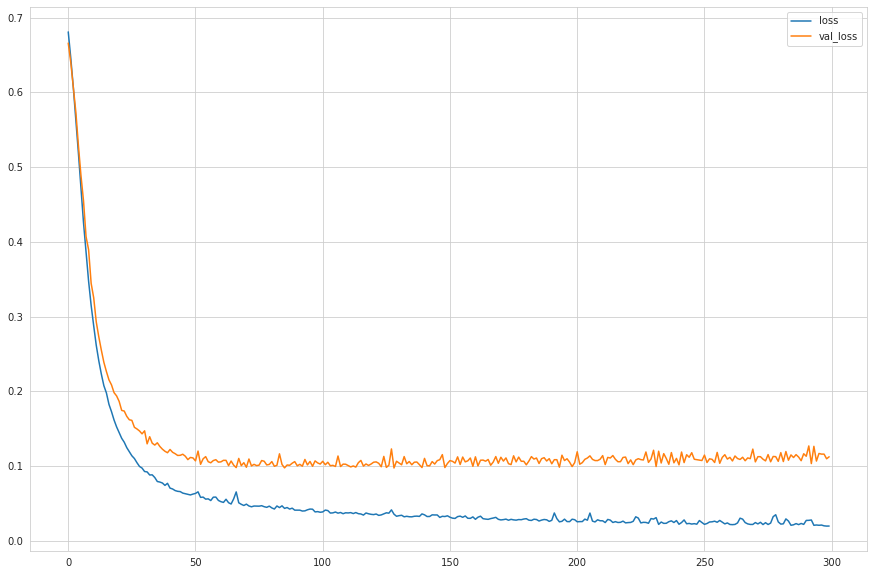

In [30]:
pd.DataFrame(model1.history.history).plot(figsize=(15,10))
#Here we plot both our training data and validation data to detect overfitting
#There seem a overfiting in our model, it means too many epochs and we need to decrease it

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
# We will use EarlyStopping when the algorithm began to detrail from the validation data

EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.

In [32]:
early_stop=EarlyStopping(monitor="val_loss", patience=24, verbose=1, mode="min")
# Here we select mode as minimum because we want to minimize the validation loss,it is higher as we can see in the plot above
#Patience means even if the algorithm encounters a divergence, it will wait 24 apochs more to be sure about stoppimg training

In [33]:
#we have redefine our model from the beginning
model2=Sequential()
model2.add(Dense(units=30, activation="relu")) 
model2.add(Dense(units=15, activation="relu"))
model2.add(Dense(units=1, activation="sigmoid")) 
model2.compile(loss="binary_crossentropy",optimizer="adam")

In [34]:
# here we will add our early stop into callbacks parameter
model2.fit(x=X_deep_train,y=y_deep_train,epochs=300, validation_data=(X_deep_test, y_deep_test), callbacks=[early_stop])

Epoch 1/300
14/14 [==============================] - 0s 10ms/step - loss: 0.6823 - val_loss: 0.6742
Epoch 2/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6439 - val_loss: 0.6428
Epoch 3/300
14/14 [==============================] - 0s 3ms/step - loss: 0.6026 - val_loss: 0.5983
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 0.5459 - val_loss: 0.5500
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 0.4811 - val_loss: 0.5020
Epoch 6/300
14/14 [==============================] - 0s 2ms/step - loss: 0.4200 - val_loss: 0.4339
Epoch 7/300
14/14 [==============================] - 0s 2ms/step - loss: 0.3610 - val_loss: 0.3916
Epoch 8/300
14/14 [==============================] - 0s 2ms/step - loss: 0.3155 - val_loss: 0.3347
Epoch 9/300
14/14 [==============================] - 0s 2ms/step - loss: 0.2780 - val_loss: 0.3163
Epoch 10/300
14/14 [==============================] - 0s 3ms/step - loss: 0.2470 - val_loss: 0.2711
Epoch 11

As we can see above, the early stopp happened in the 73 epoch, so we do not need to worry about how many epochs we should assign when we use early stop

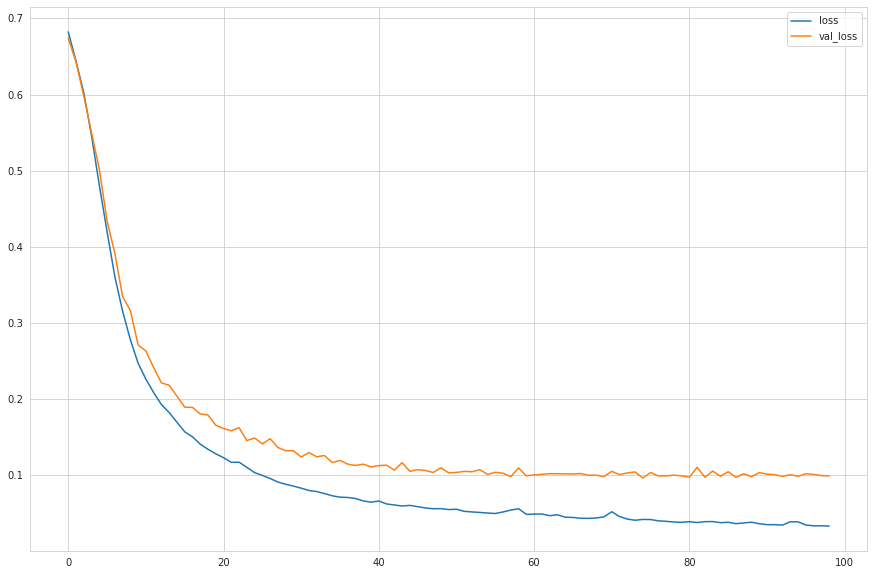

In [35]:
pd.DataFrame(model2.history.history).plot(figsize=(15,10))
# in the plot below we can see that early stop worked good before our model began to diverge too much 

There other tecniques to prevent overfitting, one of them is adding dropout layers into our model that will drop percentage of neurons randomly 

We have to recreate out model in order to see the difference

In [36]:
from tensorflow.keras.layers import Dropout


 |  The Dropout layer randomly sets input units to 0 with a frequency of `rate`
 |  at each step during training time, which helps prevent overfitting.
 |  Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
 |  all inputs is unchanged.
 
 Fraction of the input units to drop.

In [37]:
model3=Sequential()
model3.add(Dense(units=30, activation="relu"))
model3.add(Dropout(0.5)) # we can choose the precentage between 0 and 100, 0.5 represents %50 of the layer
model3.add(Dense(units=15, activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(units=1, activation="sigmoid")) 
model3.compile(loss="binary_crossentropy",optimizer="adam")
model3.fit(x=X_deep_train,y=y_deep_train,epochs=300, validation_data=(X_deep_test, y_deep_test), callbacks=[early_stop])
# we will also use early stop as we did in the previous model

Epoch 1/300
14/14 [==============================] - 0s 20ms/step - loss: 0.7008 - val_loss: 0.6746
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 0.6706 - val_loss: 0.6584
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 0.6648 - val_loss: 0.6466
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 0.6533 - val_loss: 0.6374
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 0.6209 - val_loss: 0.6256
Epoch 6/300
14/14 [==============================] - 0s 2ms/step - loss: 0.6267 - val_loss: 0.6106
Epoch 7/300
14/14 [==============================] - 0s 2ms/step - loss: 0.5986 - val_loss: 0.6040
Epoch 8/300
14/14 [==============================] - 0s 2ms/step - loss: 0.5958 - val_loss: 0.5829
Epoch 9/300
14/14 [==============================] - 0s 2ms/step - loss: 0.5704 - val_loss: 0.5635
Epoch 10/300
14/14 [==============================] - 0s 3ms/step - loss: 0.5498 - val_loss: 0.5522
Epoch 11

Thanks to dropout, our model could train until 131. epoch

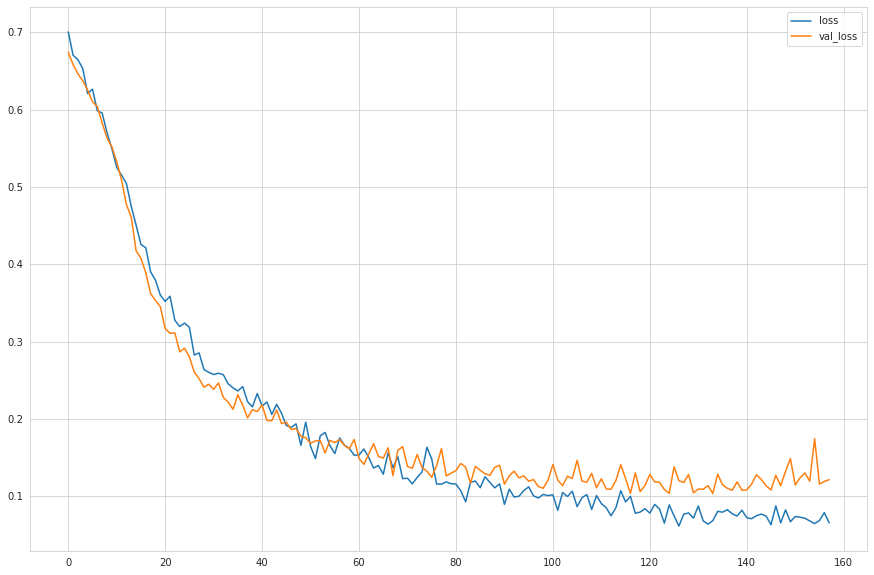

In [38]:
pd.DataFrame(model3.history.history).plot(figsize=(15,10))
#Our model performs better than previous models thanks to dropout

# 3. Evaluation of Performances of Our Models

Here we will compare the performances of the models we have used above

In [39]:
predictions1=model1.predict_classes(X_deep_test) 
predictions2=model2.predict_classes(X_deep_test)#this model is the our model's performance with early stop
predictions3=model3.predict_classes(X_deep_test)# This model represents our model with early stop and dropout layer

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print("The Report of Model 1: ", classification_report(y_deep_test, predictions1))
print("The Confusion Table of Model 1:", confusion_matrix(y_deep_test,predictions1))
print("*******************************************************************")
print("The Report of Model 2: ", classification_report(y_deep_test, predictions2))
print("The Confusion Table of Model 2:", confusion_matrix(y_deep_test,predictions2))
print("*******************************************************************")
print("The Report of Model 3: ", classification_report(y_deep_test, predictions3))
print("The Confusion Table of Model 3:", confusion_matrix(y_deep_test,predictions3))
print("*******************************************************************")


The Report of Model 1:                precision    recall  f1-score   support

           0       1.00      0.93      0.96        56
           1       0.96      1.00      0.98        87

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

The Confusion Table of Model 1: [[52  4]
 [ 0 87]]
*******************************************************************
The Report of Model 2:                precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.98      1.00      0.99        87

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

The Confusion Table of Model 2: [[54  2]
 [ 0 87]]
*******************************************************************
The Report of Model 3:                precision    recall  f

In the reports above we can easily see that the last model with dropout layers and early stop outperform better than the others with %97 accuracy and only 5 FalsePositives compared to %96 accuracy and 1 False neagtive and 5 False Positive of the 2. Model and %92 Accuracy and 7 False Negatives and 4 False Positives of the 1. Model. In predicting cancer tumors as benign and malignant it is very important to have 0 False Negative because we do not want to say a pation that the person has not the malignant cancer tumor althoug he has, it is very dangerous. Therefore, the model3 is very good because it has 0 False Negative prediction